# Prosper Loan Dataset
## by Lina AlKhodair

## Preliminary Wrangling

> The data set contains information concerning 113,937 loan listings, including loan amount, borrower rate, current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# loading the dataset
df_loan = pd.read_csv('prosperLoanData.csv')
df_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
#size of dataset
df_loan.shape

(113937, 81)

In [3]:
# explore dataset: types, non-null 
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
# dataframe stats
df_loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [8]:
# number of duplicates
sum(df_loan.duplicated())

0

In [10]:
# for and extended view
pd.set_option('display.max_column',None)
pd.set_option('display.max_rows',None)

In [11]:
#explore variables' null values
df_loan.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [12]:
#copying dataframe so we can drop some columns
df = df_loan.copy()

In [14]:
# remove columns and columns with empty values that are not useful in the Dateset
df.drop(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'ClosedDate', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanKey', 'TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber'], axis=1, inplace = True)

In [115]:
# converting ProsperRating into ordered categorical types
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype(ordered_var)

In [15]:
df.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,640.0,659.0,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,680.0,699.0,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,480.0,499.0,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,800.0,819.0,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,44.0,True,680.0,699.0,19.0,19.0,49.0,6,220.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,6193.0,0.81,695.0,39.0,0.95,2.0,0.26,"$100,000+",True,9583.333333,6,102670,15000,2013-09-20 00:00:00,Q3 2013,36CE356043264555721F06C,563.97,2819.85,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### What is the structure of your dataset?

> There are total of 113937 loans entries saved in the dataset and 81 features. The dataset gathers information on the background information of borrower and details regarding the loans.

### What is/are the main feature(s) of interest in your dataset?

> The analysis will focus on figureing out what features could influence the borrower's Annual Percentage Rate (APR) for the loan.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I propose that the total loan amount, monthly income, loan term, Prosper score, employment status will have some effect on APR

## Univariate Exploration


- How are the different variables distributed? 

Text(0, 0.5, 'count')

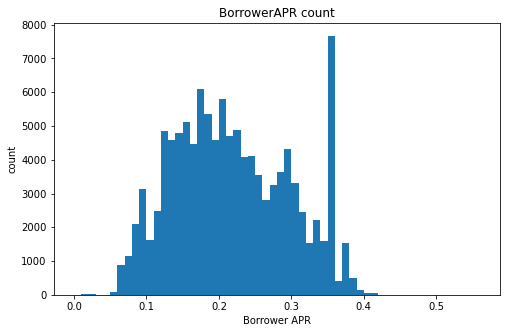

In [114]:
# creating a histogram for BorrowerAPR to explore distribution
bins = np.arange(0, df.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');
plt.title('BorrowerAPR count')
plt.ylabel('count')

BorrowerAPR count: there is a semi large peak centered around 0.2. Also a very exceptional high around 0.35 and small amount of loans have APR greater than 0.4.

Text(0, 0.5, 'count')

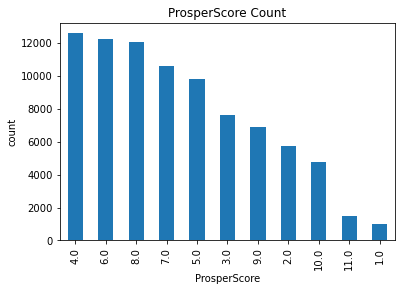

In [20]:
# a bar plot for the distribution of ProsperScore variable
df['ProsperScore'].value_counts().plot(kind='bar')
plt.title('ProsperScore Count')
plt.xlabel('ProsperScore')
plt.ylabel('count')

ProsperScore count: the lower the ProsperSccore the higher count of borrowers

Text(0.5, 1.0, 'LoanOriginalAmount Count')

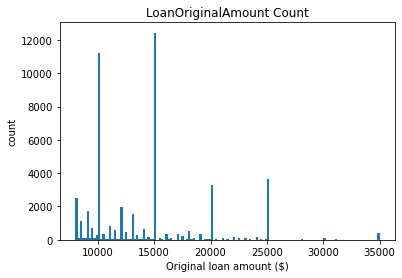

In [24]:
# a histogram for the distribution of loan original amount 
bins = np.arange(8000, df.LoanOriginalAmount.max()+200, 200)
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Original loan amount ($)');
plt.ylabel('count')
plt.title('LoanOriginalAmount Count')

The highest frequencies are for loan amounts 10k, 15k, 20k, 25k, and 35k

Text(0.5, 1.0, 'MonthlyIncome Count')

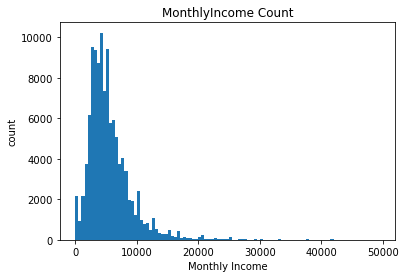

In [27]:
# a hitsogram for the distribution of monthly income
bins = np.arange(0, 50000, 500)
plt.hist(data = df, x = 'StatedMonthlyIncome', bins=bins);
plt.xlabel('Monthly Income');
plt.ylabel('count')
plt.title('MonthlyIncome Count')

In [28]:
# to get the most common monthly incoms
df.StatedMonthlyIncome.value_counts().head()

4166.666667    3526
5000.000000    3389
3333.333333    2917
3750.000000    2428
5416.666667    2374
Name: StatedMonthlyIncome, dtype: int64

We can observe that borrowers monthly income most likely is less 30k, and most occuring income is around 5k range

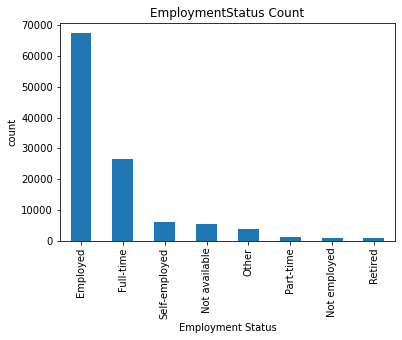

In [33]:
# bar plot to explore distribution employment status variable
df['EmploymentStatus'].value_counts().plot(kind='bar')
plt.title('EmploymentStatus Count')
plt.xlabel('Employment Status')
plt.ylabel('count')
plt.figsize=(12,12)

We can gather that most borrowers are employed and full-time. 

- What is the most common Loan Term?

Text(0.5, 1.0, 'Loan Term Count')

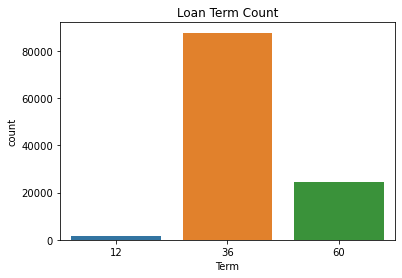

In [37]:
# bar plot to see the most common loan term
sb.countplot(data = df, x = 'Term')
plt.title('Loan Term Count')

36 months is the most common loan term. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of borrowers APR looks normal. There are no unusual points and no need to perform any transformations. The variables are explored for more understanding of Borrower's APR.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Most stated monthly incomes are less than 30k. However, very few borrowers have stated monthly income greater than 30k, these can be seemed as outlier. There is no need to perform any transformations.



## Bivariate Exploration

- Does Borrower APR increase or decrease with better Prosper ratings/scores?

Text(0, 0.5, 'BorrowerAPR')

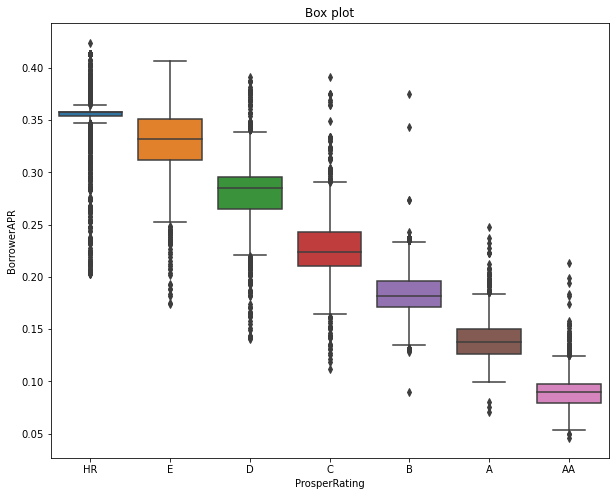

In [116]:
# boxplot to investigate the correlation between Prosper rating and borrower APR
sb.boxplot(data = df, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR')
plt.gcf().set_size_inches(10, 8)
plt.title('Box plot')
plt.xlabel('ProsperRating')
plt.ylabel('BorrowerAPR')

For the box plot of BorrowerAPR vs. ProsperRating we can conclude that borrower APR decreases when increasing rating. Borrowers with the greater Prosper ratings have the lower APR. Thus, negative correlation.

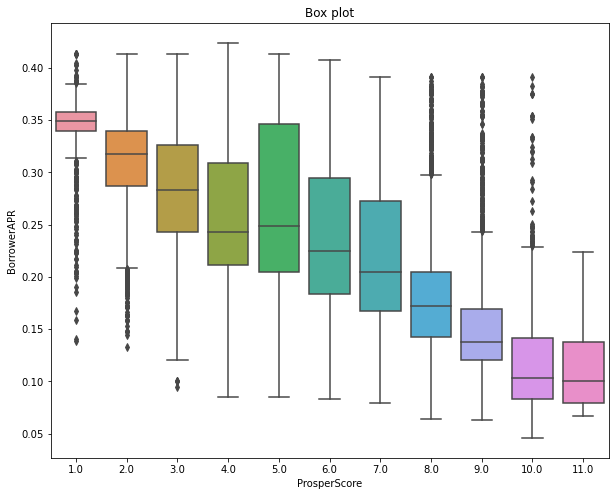

In [60]:
# boxplot to investigate the correlation between Prosper score and borrower APR
sb.boxplot(data = df, x = 'ProsperScore', y = 'BorrowerAPR')
plt.gcf().set_size_inches(10, 8)
plt.title('Box plot')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR');

From the plot ProsperScore and BorrowerAPR have a negative correlation.

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Self-employed'),
  Text(1, 0, 'Employed'),
  Text(2, 0, 'Not available'),
  Text(3, 0, 'Full-time'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Not employed'),
  Text(6, 0, 'Part-time'),
  Text(7, 0, 'Retired')])

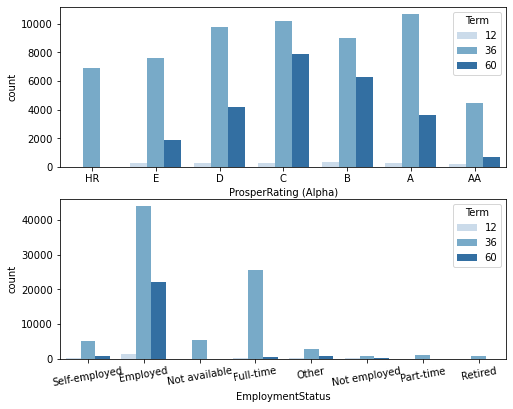

In [117]:
plt.figure(figsize = [8, 10])

# bar plots to investigate the relationship between term and different prosper ratings
plt.subplot(3, 1, 1)
sb.countplot(data = df, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Blues')

# bar plots to investigate the relationship between term and different employment statuses
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.xticks(rotation=10)


The relationship between term and Prosper rating, there 60 month loans on B and C ratings and there is only 36 months loans for HR rating borrowers. Also, borrowers with (Employed) status have greatest term amounts. 

- Does the borrower APR decrease or increase with greater original loan amounts?

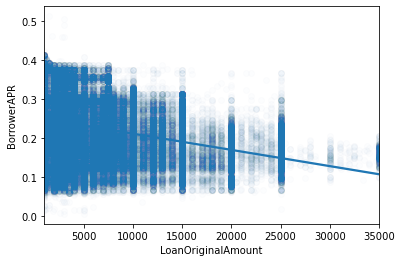

In [79]:
# scatter plot to explore correlation between borrower APR and loan original amount
sb.regplot(data = df, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01});

The plot shows the negative correlation between LoanOriginalAmount and BorrowerAPR. Thus, borrower APR decreases with increasing loan original amount.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> After exploring relationships between different variables and their effect on BorrowerAPR we can conclude: There is a negative relationship between BorrowerAPR and LoanOriginalAmount. Also, the ProsperScore has negative correlation with BorrowerAPR.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> An interesting relationship between prosper rating and term. There is only 36 months loans for HR rating borrowers. On the other hand, there are more 60 month loans on B and C ratings. Also, there is a positive correlation between LoanOriginalAmount and StatedMonthlyIncome, which makes sense borrowers with more monthly income could loan more money.

## Multivariate Exploration


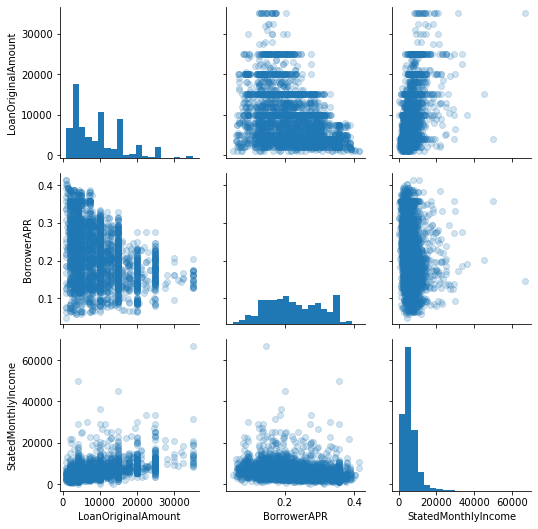

In [58]:
# scatter plot to explore relationship between different variables
num_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome']
# sample of the dataframe for a clearer visualization
samples = df.sample(5000)
g = sb.PairGrid(data = samples.dropna(), vars = num_vars)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=0.2);

The loan original amount and monthly income can be considered to have a positive correlation which makes sense since borrowers with more monthly income could loan more money. As for LoanOriginalAmount and APR it verifies the negative correlation.

Text(0.5, 1.0, 'Correlation Plot')

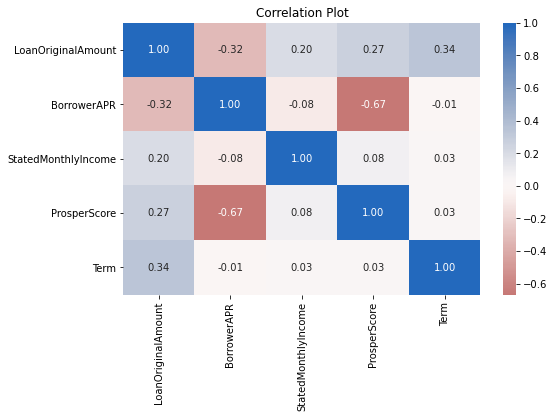

In [55]:
# heatmap to explore correlation between different variables
num_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'ProsperScore', 'Term']
plt.figure(figsize = [8, 5])
sb.heatmap(df[num_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0);
plt.title("Correlation Plot")

Correlation plot: BorrowerAPR and LoanOriginalAmount are negativly correlated that is the more the loan amount, the lower the APR. As well as BorrowerAPR and ProsperScore have negative correlation. Overall, there are no strong positive correlation between any pairs

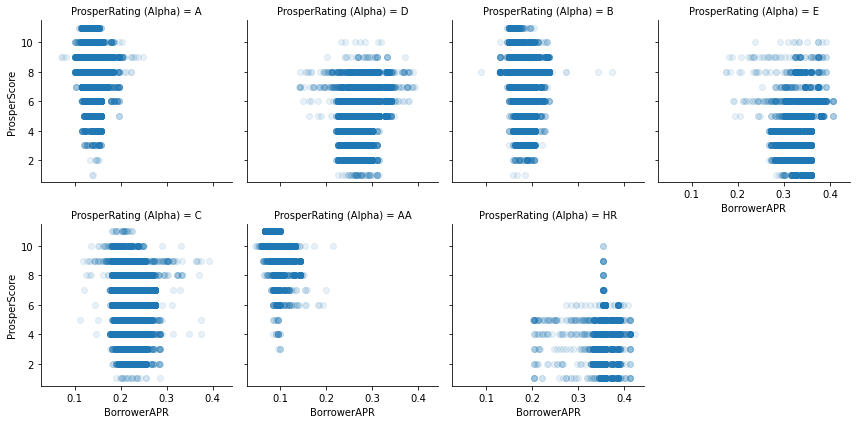

In [88]:
# a scatter plot to study relationship between prosper score, prosper rating and borrower APR
g = sb.FacetGrid(data = df, col = 'ProsperRating (Alpha)', col_wrap = 4, height = 3)
g.map(plt.scatter, 'BorrowerAPR', 'ProsperScore', alpha = 0.1)
g.set_xlabels('BorrowerAPR')
g.set_ylabels('ProsperScore')

The plot shows that borrowers with HR rating have the highest APR. The visualization shows groups of people in terms of APR received based on their rating and scores.

- Does term affect relationship between loan original amount and borrower APR?

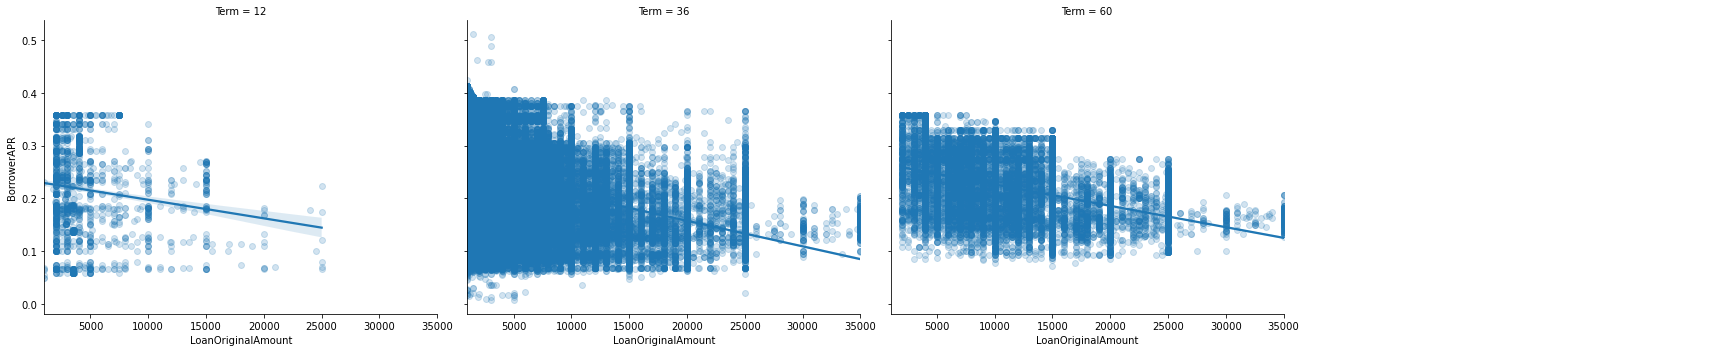

In [97]:
# scatter plot to study relationship between loan original amount and borrower APR for different terms
g=sb.FacetGrid(data=df, aspect=1.2, height=5, col='Term', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.05, scatter_kws={'alpha':0.2});
g.add_legend();

From the plot we can gather that term doesn't have a strong effect on BorrowerAPR and LoanOriginalAmount

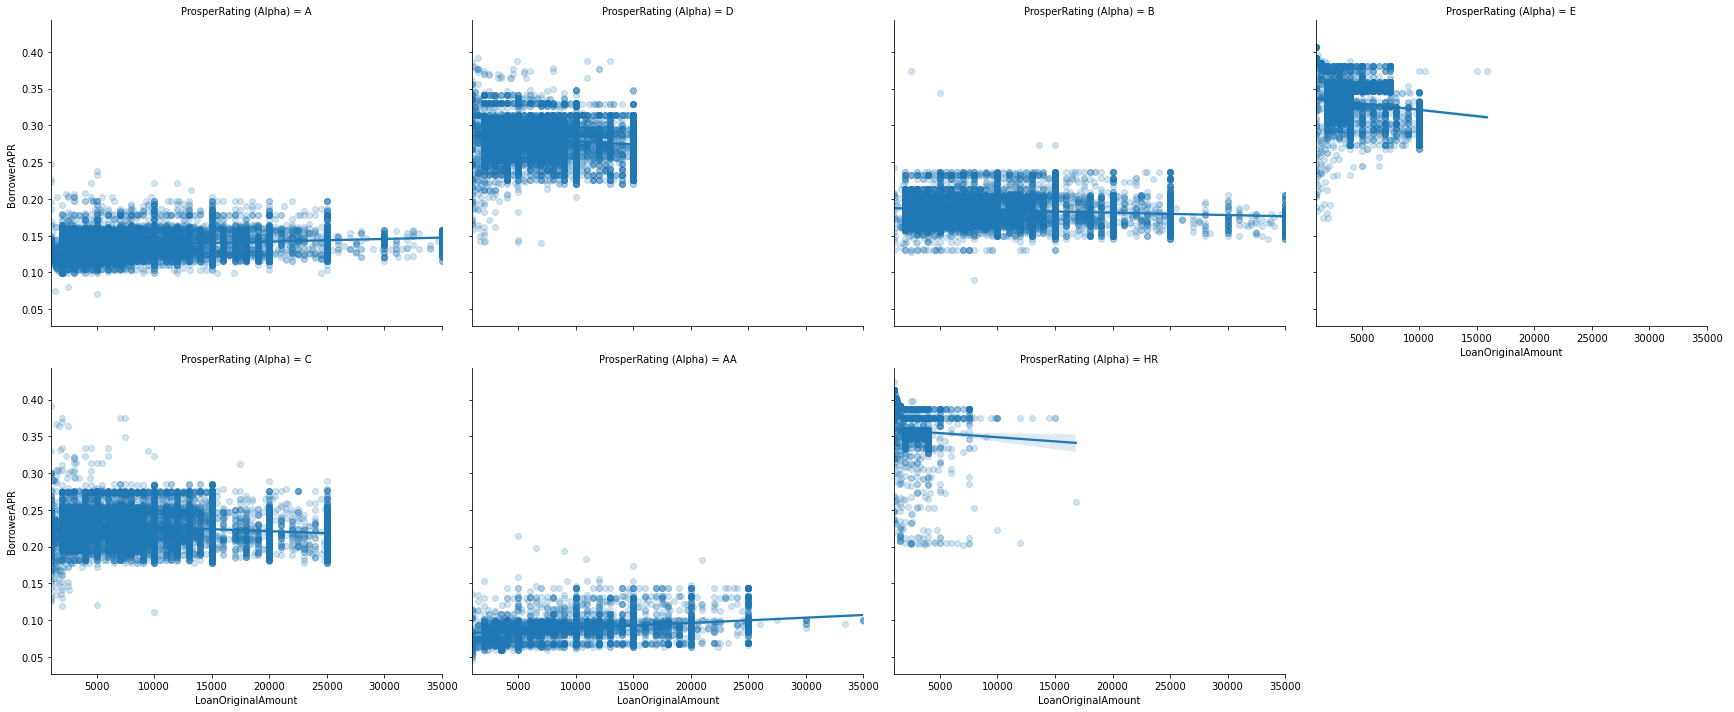

In [113]:
# scatter plot to study relationship between loan original amount and borrower APR for different prosper ratings
g=sb.FacetGrid(data=df, aspect=1.2, height=5, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.05, scatter_kws={'alpha':0.2});
g.add_legend();

From the plot we can see that relationship between LoanOriginalAmount and BorrowerAPR starts out with negative when ProsperRating is low from HR and then changes to positive when ProsperRating is increased to A or better. Also, when increasing the PropserRating LoanOriginalAmount increases too. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The visualization shows the lowerest rating(HR) of borrowers have the highest APR. For high rating AA, the borrowers has the lowers APR. The visualizations also showed that the relationship between BorrowerAPR and LoanOriginalAmount turns from negative to somehow positive when the Prosper ratings increased from HR to AA. Another exploration was the effects of the rating and term on loan amount and it shows that when increasing the PropserRating LoanOriginalAmount increases too.

### Were there any interesting or surprising interactions between features?

> An interesting relationship between the BorrowerAPR and LoanOriginalAmount, it starts out negatively correlated when the Prosper ratings are from HR to B, but then changees to be positive when the ratings are A and AA. 